## Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #UPDATE FEATURES AT THE SAME SCALE
from sklearn.cluster import KMeans  # MARKET SEGMENTATION
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Content

- [I.-Exploratory Data Analysis (EDA)](#I.-Exploratory-Data-Analysis-(EDA))
 - [I.1.-Missing Values](#I.1.-Missing-Values)
 - [I.2.-Statistical plots](#I.2.-Statistical-plots)
 - [I.3.-Scaling](#I.3.-Scaling)
 - [I.4.-Principal component analysis (PCA)](#I.4.-Principal-component-analysis-(PCA))
- [II.-Determining the number of clusters](#II.-Determining-the-number-of-clusters)
 - [II.1.-Elbow method](#II.-Elbow-method)
 - [II.2.-Silhouette Coefficient](#II.2.-Silhouette-Coefficient)
- [III.-Modelling](#III.-Modelling)



## I.-Exploratory Data Analysis (EDA)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')#open and reading a csv
#path = '/content/CC GENERAL.csv'
#creditcard_df = pd.read_csv(path)
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.shape#checking size of the dataframe

(8950, 18)

In [4]:
creditcard_df.head() #seeing the first 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()#printing summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()##looking at the five-number summary  of Statistic

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### I.1.-Missing Values

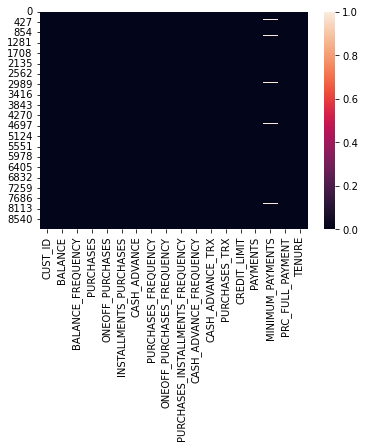

In [7]:
# Visualization of the missing values.
sns.heatmap(creditcard_df.isnull());

In [8]:
creditcard_df.isnull().sum()  # Checking missing values.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
creditcard_df['MINIMUM_PAYMENTS'].mean()# Checking mean of the column with missing Values= 'MINIMUM_PAYMENTS'

864.2065423050816

In [10]:
# Localizing the missing values in the column 'MINIMUM_PAYMENTS' and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
#Checking the mean of the column with missing Values= 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
# Localizing the missing values in the column 'CREDIT_LIMIT and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
# Checking missing values after the overwriting using mean
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

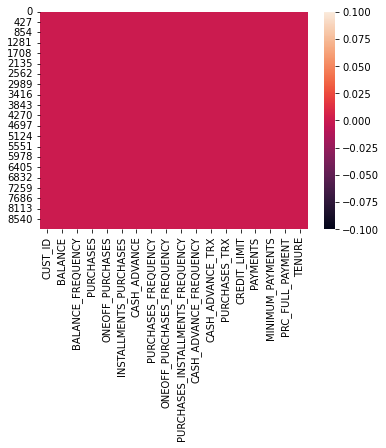

In [14]:
# Visualization of the missing values after the overwriting using mean
sns.heatmap(creditcard_df.isnull());

In [15]:
## Checking duplicated information
creditcard_df.duplicated().sum()

0

In [16]:
#dropping 'CUST_ID'columns
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
creditcard_df.head()#looking at first 5 rows  after dropping ID column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
creditcard_df.columns#looking at the columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [19]:
len(creditcard_df.columns)#It has 17 column

17

### I.2.-Statistical plots

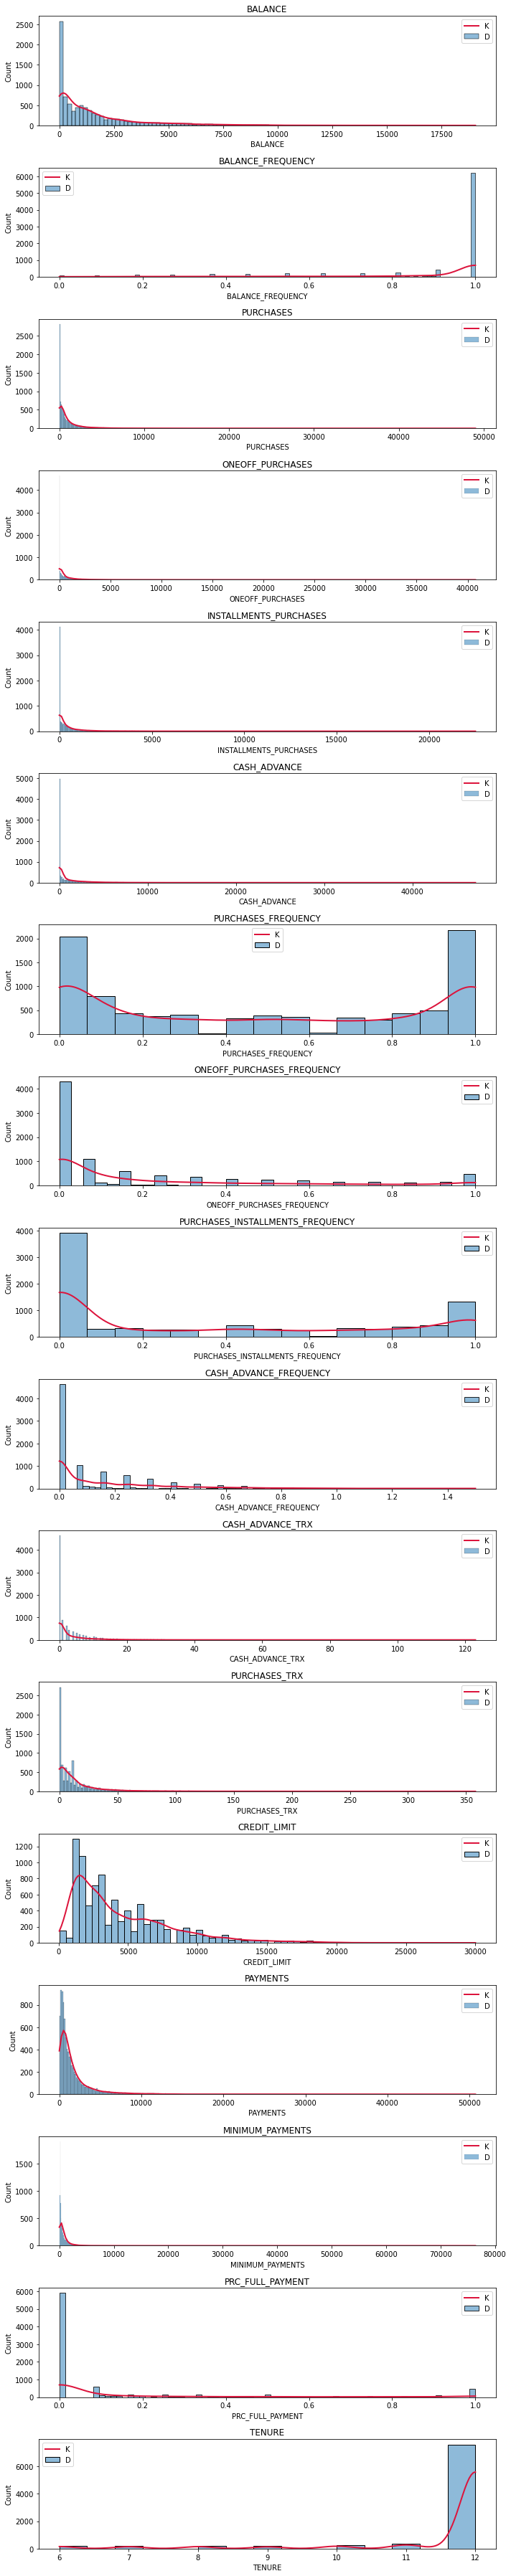

In [20]:
## plotting the distribution of each column
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1) ## KDE = kernel density estimate to smooth the distribution as line
    ax=sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True, line_kws={'linewidth': 2})
    ax.lines[0].set_color('crimson')
    plt.title(creditcard_df.columns[i])
    plt.legend('KDE')
    plt.tight_layout();

<AxesSubplot:>

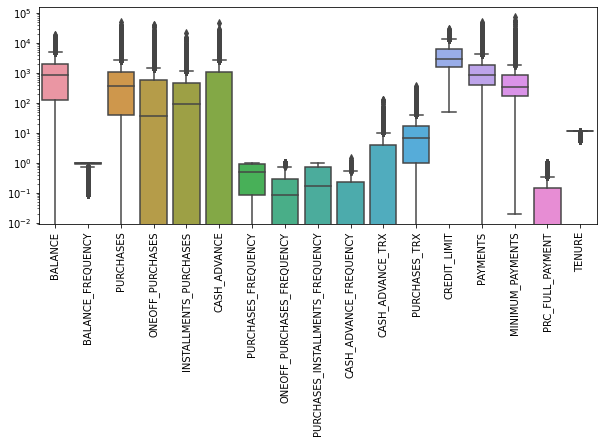

In [21]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=creditcard_df)

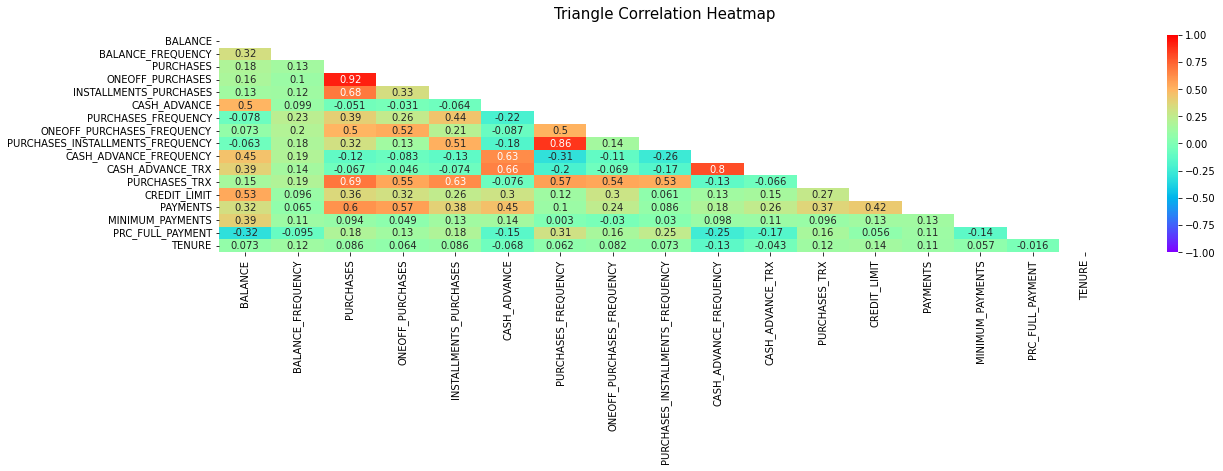

In [22]:
## checking the Pearson correlation
from warnings import filterwarnings #Avoiding warning messages
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

plt.figure(figsize = (20,4))#setting size of figure

#creating a triangle mask with Pearson Correlation
mask = np.triu(np.ones_like(creditcard_df.corr(method = "pearson"), dtype=np.bool))

#creating a Heatmap, with Pearson Correlation And adding the triangle mask
heatmap= sns.heatmap(creditcard_df.corr(), mask=mask, vmin=-1, vmax=1, annot = True, cmap="rainbow")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=16);#setting title
heatmap.tick_params(labelsize=10)# label size
plt.show()

### I.3.-Scaling


In [23]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE']) #The difference in scale is to big. We need to use a scaler to put on the same scaler.

(0.0, 19043.13856)

In [24]:
#Let's use the Standard Scaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
type(creditcard_df_scaled), type(creditcard_df)#looking at the type information of both after and before scaling

(numpy.ndarray, pandas.core.frame.DataFrame)

In [26]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])#Checking the array after scaling

(-0.9604333444542572, 0.36067954425377496)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### I.4.-Principal component analysis (PCA)

PCA df
Original shape: (8950, 17)
Reduced shape: (8950, 17)


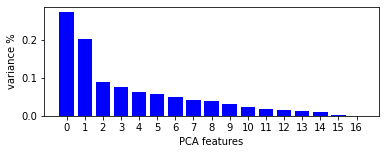

PCA Overview
Total: 17 components
------------------------------
Mean explained variance: 0.059
------------------------------
    explained variance  cumulative
1         2.729004e-01    0.272900
2         2.030199e-01    0.475920
3         8.791979e-02    0.563840
4         7.479975e-02    0.638640
5         6.262792e-02    0.701268
6         5.750211e-02    0.758770
7         4.887235e-02    0.807642
8         4.257486e-02    0.850217
9         3.828804e-02    0.888505
10        3.080006e-02    0.919305
11        2.371897e-02    0.943024
12        1.773632e-02    0.960760
13        1.426492e-02    0.975025
14        1.217369e-02    0.987199
15        1.012990e-02    0.997329
16        2.670336e-03    0.999999
17        6.852235e-07    1.000000
------------------------------


In [28]:
# keep the first four principal components of the data
print("PCA df")
pca = PCA()#n_components = 20
# fit PCA model 
principalComponents = pca.fit(creditcard_df_scaled)
# transform data onto the first two principal components
df_X_pca  = pca.transform(creditcard_df_scaled)
print("Original shape: {}".format(str(creditcard_df_scaled.shape)))
print("Reduced shape: {}".format(str(df_X_pca.shape)))


# Plot the explained variances
plt.figure(figsize=(6, 2))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                      index=['explained variance', 'cumulative'],
                                      columns=idx).T

                                      

plt.show()
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# Print explained variance as plain text
print('PCA Overview')
print('='*30)
print("Total: {} components".format(n_components))
print('-'*30)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*30)
print(df_explained_variance.head(20))
print('-'*30)

## II.-Determining the number of clusters

### II.1.-Elbow Method

In [29]:
distortions = []# the average of the squared distances 
inertias = []#sum of squared distances of samples to their closest cluster center.
map1 = {}
map2 = {}
K= range(1, 10)
for i in K:
    # Building and fitting the model
    Model = KMeans(n_clusters=i).fit(creditcard_df_scaled)
    Model.fit(creditcard_df_scaled)
    label = Model.labels_
 
    distortions.append(sum(np.min(cdist(creditcard_df_scaled, Model.cluster_centers_,
                                        'euclidean'), axis=1)) / creditcard_df_scaled.shape[0])
    inertias.append(Model.inertia_)
 
    map1[i] = sum(np.min(cdist(creditcard_df_scaled, Model.cluster_centers_,
                                   'euclidean'), axis=1)) / creditcard_df_scaled.shape[0]
    map2[i] = Model.inertia_

In [30]:
for key, val in map1.items():
    print(f'{key} : {val}')

1 : 3.525083325834247
2 : 3.14414963826515
3 : 3.0277369349768195
4 : 2.818475745014838
5 : 2.7170968673262146
6 : 2.5630673023840775
7 : 2.5080331573509236
8 : 2.4204266011278426
9 : 2.3679730758728996


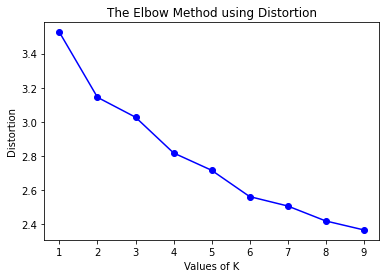

In [31]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [32]:
for key, val in map2.items():
    print(f'{key} : {val}')

1 : 152150.00000000006
2 : 127785.12272063471
3 : 111986.67194121177
4 : 99074.37049386367
5 : 91502.9386436945
6 : 84850.30015262144
7 : 79753.5606750262
8 : 76049.20909179875
9 : 71074.64592399864


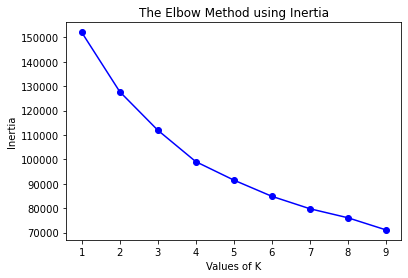

In [33]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### II.2.-Silhouette Coefficient

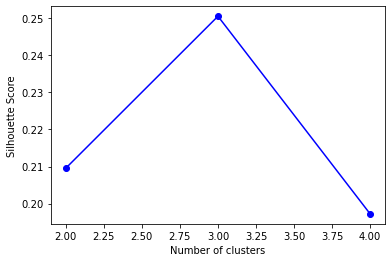

In [34]:
silhouette_scores = [] 

for k in range(2, 5):
    silhouette_scores.append( 
        silhouette_score(creditcard_df_scaled, KMeans(n_clusters = k).fit_predict(creditcard_df_scaled)))
    # Plotting a bar graph to compare the results 
k = [2, 3, 4] 
plt.plot(k, silhouette_scores, "bo-") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

plt.show() 

## III.-Modelling

In [35]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn.metrics.pairwise import pairwise_distances_argmin

#from sklearn.model_selection import GridSearchCV

In [36]:
allResults = pd.DataFrame()
x= creditcard_df.values
x= creditcard_df_scaled

Silhouette Score: 0.4676551448676235


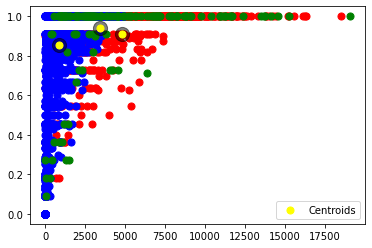

In [37]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_

# Visualising the clusters using scatter() method
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.legend(loc ="best") 
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
allResults['KMeans_labels'] = kmeans.labels_
allResults['KMeans_Score'] = silhouette_score(x, y_kmeans)

Silhouette Score: 0.3882657711143604


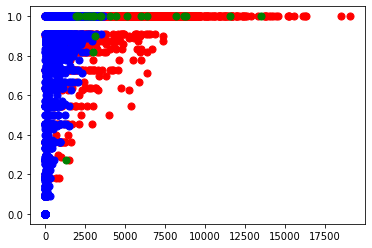

In [38]:
kmeans = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green')

print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')
# Create an additional column in the dataframe (df) as KMeans_labels
allResults['AC_labels'] = kmeans.labels_
allResults['AC_Score'] = silhouette_score(x, y_kmeans)

Silhouette Score: 0.34049860495702705


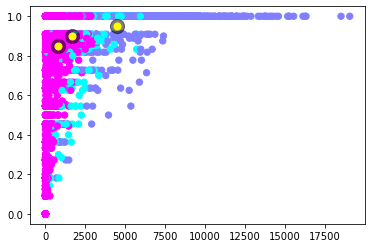

In [39]:
x= creditcard_df.values
kmeans = FCM(n_clusters = 3)
y_kmeans = kmeans.fit(x)
centers = kmeans.centers
# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = kmeans.u.argmax(axis = 1)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=fcm_labels, s=40, cmap='cool')
# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(centers[:, 0], centers[:,1], s = 50, c = 'yellow', label = 'Centroids')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, fcm_labels)}')
# Create an additional column in the dataframe (df) as KMeans_labels
allResults['FCM_labels'] = fcm_labels
allResults['FCM_Score'] = silhouette_score(x, fcm_labels)

Silhouette Score: -0.4437013266683457


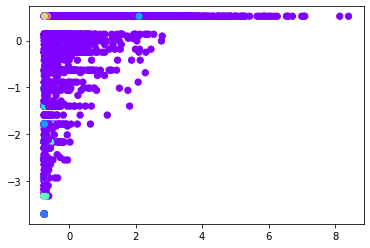

In [40]:
kmeans = DBSCAN()
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_,  s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
allResults['DBSCAN_labels'] = kmeans.labels_
allResults['DBSCAN_Score'] = silhouette_score(x, kmeans.labels_)

Silhouette Score: 0.11135426898519059


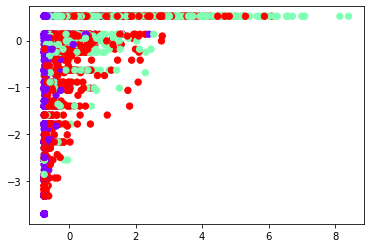

In [41]:
kmeans =  GaussianMixture(n_components=3)
y_kmeans = kmeans.fit(x)
labels= y_kmeans.predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1],c=labels,s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, labels)}')

# Create an additional column in the dataframe 
allResults['GM_labels'] =labels
allResults['GM_Score'] = silhouette_score(x,labels)

Silhouette Score: 0.16297629098635402


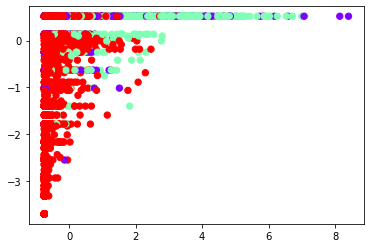

In [42]:
kmeans = Birch(n_clusters=3)
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_,  s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
allResults['Birch_labels'] = kmeans.labels_
allResults['Birch_Score'] = silhouette_score(x, kmeans.labels_)

Silhouette Score: -0.5245418027782617


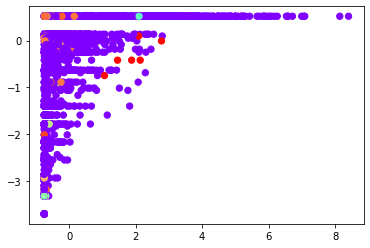

In [43]:
kmeans =  OPTICS()
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_,  s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
allResults['OPTICS_labels'] = kmeans.labels_
allResults['OPTICS_Score'] = silhouette_score(x, kmeans.labels_)

In [91]:
allResults.describe()

,KMeans_labels,KMeans_Score,AC_labels,AC_Score,FCM_labels,FCM_Score,DBSCAN_labels,DBSCAN_Score,GM_labels,GM_Score,Birch_labels,Birch_Score,OPTICS_labels,OPTICS_Score
count,8950.000000,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8.950000e+03
mean,0.761229,4.676551e-01,0.608492,3.882658e-01,1.338771,3.404986e-01,0.040670,-4.437013e-01,0.872179,1.113543e-01,1.147039,1.629763e-01,4.464246,-5.245418e-01
std,0.459166,9.220917e-14,0.493352,3.769418e-14,0.864676,6.778290e-14,3.859633,1.354548e-14,0.861758,1.096406e-14,0.908638,2.756283e-14,19.039003,4.385626e-14
min,0.000000,4.676551e-01,0.000000,3.882658e-01,0.000000,3.404986e-01,-1.000000,-4.437013e-01,0.000000,1.113543e-01,0.000000,1.629763e-01,-1.000000,-5.245418e-01
25%,0.000000,4.676551e-01,0.000000,3.882658e-01,0.000000,3.404986e-01,-1.000000,-4.437013e-01,0.000000,1.113543e-01,0.000000,1.629763e-01,-1.000000,-5.245418e-01
50%,1.000000,4.676551e-01,1.000000,3.882658e-01,2.000000,3.404986e-01,-1.000000,-4.437013e-01,1.000000,1.113543e-01,1.000000,1.629763e-01,-1.000000,-5.245418e-01
75%,1.000000,4.676551e-01,1.000000,3.882658e-01,2.000000,3.404986e-01,0.000000,-4.437013e-01,2.000000,1.113543e-01,2.000000,1.629763e-01,-1.000000,-5.245418e-01
max,2.000000,4.676551e-01,2.000000,3.882658e-01,2.000000,3.404986e-01,37.000000,-4.437013e-01,2.000000,1.113543e-01,2.000000,1.629763e-01,111.000000,-5.245418e-01


In [46]:
'''x= creditcard_df_scaled

kmeans=SpectralClustering( n_init=10, n_clusters=3, affinity='rbf').fit(x)

labels = kmeans.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()
print(sc)

# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')


# Create an additional column in the dataframe (df) as KMeans_labels
allResults['SC_labels'] = kmeans.labels_
allResults['SC_Score'] = silhouette_score(x, y_kmeans)'''

"x= creditcard_df_scaled\n\nkmeans=SpectralClustering( n_init=10, n_clusters=3, affinity='rbf').fit(x)\n\nlabels = kmeans.labels_\nplt.scatter(x[:,0], x[:,1], c=labels)\nplt.show()\nprint(sc)\n\n# Display the silhouette score values\nprint(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')\n\n\n# Create an additional column in the dataframe (df) as KMeans_labels\nallResults['SC_labels'] = kmeans.labels_\nallResults['SC_Score'] = silhouette_score(x, y_kmeans)"

In [47]:
'''minibatch =MiniBatchKMeans(n_clusters=3).fit(creditcard_df_scaled)
meanshift = MeanShift(bin_seeding=True).fit(creditcard_df_scaled)
affinitypropagation= AffinityPropagation(random_state=0).fit(creditcard_df_scaled)
 '''

'minibatch =MiniBatchKMeans(n_clusters=3).fit(creditcard_df_scaled)\nmeanshift = MeanShift(bin_seeding=True).fit(creditcard_df_scaled)\naffinitypropagation= AffinityPropagation(random_state=0).fit(creditcard_df_scaled)\n '

### III.1.- K Means

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [49]:
labels, len(labels)

(array([2, 0, 2, ..., 2, 2, 2]), 8950)

In [50]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([1596, 1235, 6119], dtype=int64))

In [51]:
kmeans.cluster_centers_

array([[ 1.16146264,  0.34032506, -0.29046365, -0.20746781, -0.30570882,
         1.37785776, -0.64454468, -0.30711924, -0.55563023,  1.55907756,
         1.33983706, -0.36762478,  0.5993495 ,  0.44330141,  0.39884679,
        -0.4100761 , -0.12671273],
       [ 0.31879808,  0.43995548,  1.5278713 ,  1.27968321,  1.26120698,
        -0.24713095,  1.14310532,  1.5597449 ,  0.9570433 , -0.35868698,
        -0.25104945,  1.68039449,  0.89153764,  0.83532923,  0.15533633,
         0.4946452 ,  0.30324596],
       [-0.36739601, -0.17766325, -0.23289783, -0.20440827, -0.17504749,
        -0.30951408, -0.06279583, -0.23499222, -0.04840139, -0.3342515 ,
        -0.29880399, -0.24358261, -0.33646655, -0.28440274, -0.13542909,
         0.00704478, -0.02820832]])

In [52]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.161463,0.340325,-0.290464,-0.207468,-0.305709,1.377858,-0.644545,-0.307119,-0.555630,1.559078,1.339837,-0.367625,0.599350,0.443301,0.398847,-0.410076,-0.126713
1,0.318798,0.439955,1.527871,1.279683,1.261207,-0.247131,1.143105,1.559745,0.957043,-0.358687,-0.251049,1.680394,0.891538,0.835329,0.155336,0.494645,0.303246
2,-0.367396,-0.177663,-0.232898,-0.204408,-0.175047,-0.309514,-0.062796,-0.234992,-0.048401,-0.334251,-0.298804,-0.243583,-0.336467,-0.284403,-0.135429,0.007045,-0.028208


* Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

* Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

* Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

* Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)

In [53]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3981.961277,0.957891,382.624762,248.083296,134.618954,3868.303195,0.231664,0.110838,0.143616,0.447132,12.392231,5.572055,6675.128161,3016.457991,1793.702161,0.033774,11.347744
1,2228.026120,0.981492,4267.525421,2716.449393,1551.561464,460.625971,0.949134,0.667760,0.744791,0.063367,1.535599,56.478155,7738.228155,4151.340126,1226.211303,0.298390,11.923139
2,799.771040,0.835184,505.615025,253.161504,252.774371,329.805632,0.465148,0.132355,0.345201,0.068257,1.209709,8.655280,3270.246492,909.825781,548.594759,0.155775,11.479568


In [54]:
labels, len(labels)

(array([2, 0, 2, ..., 2, 2, 2]), 8950)

In [55]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


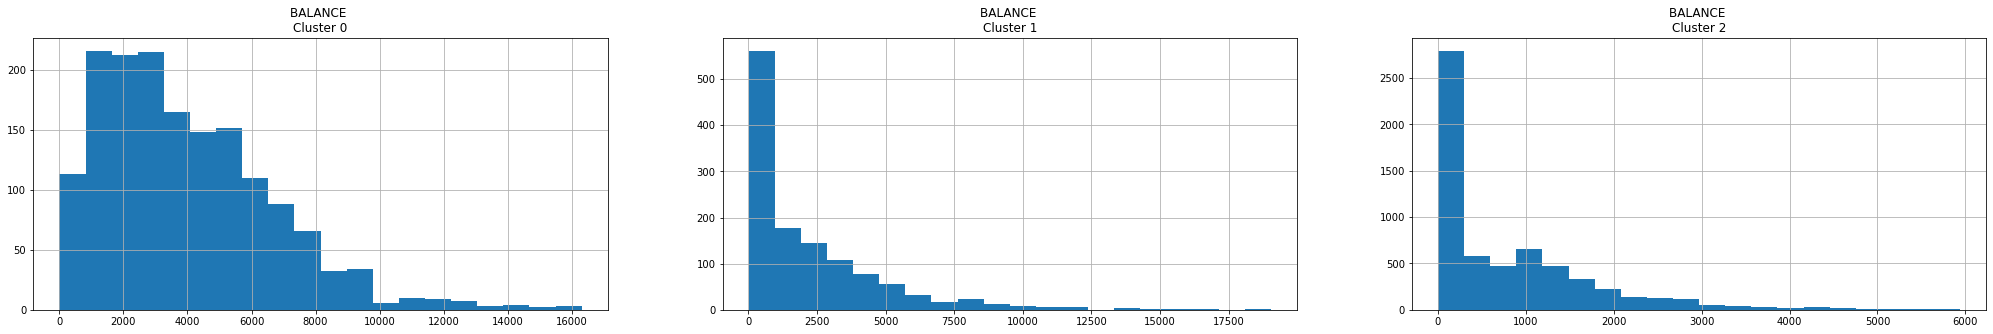

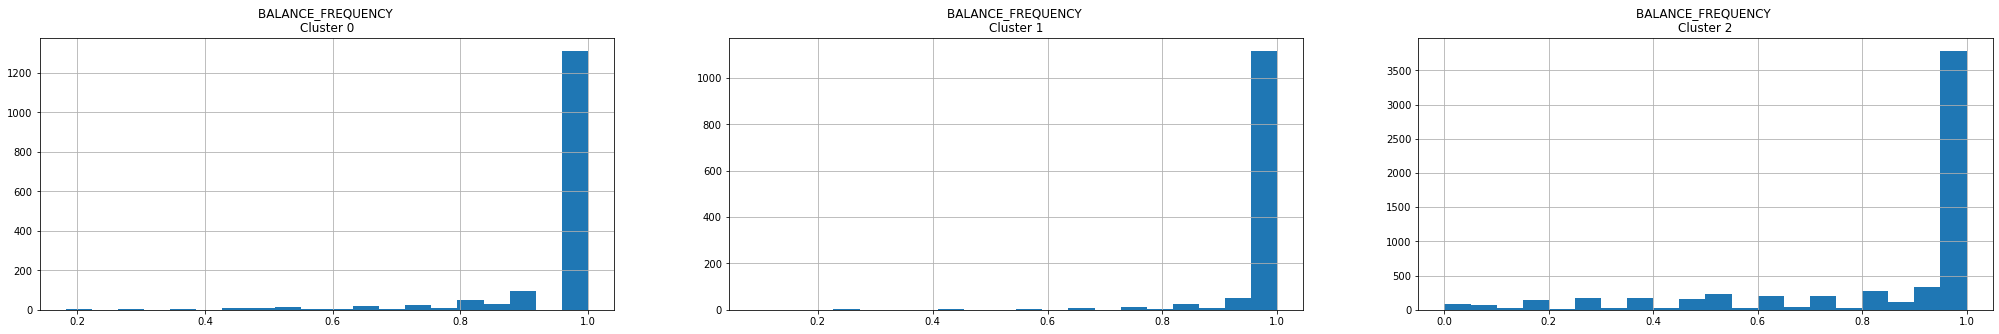

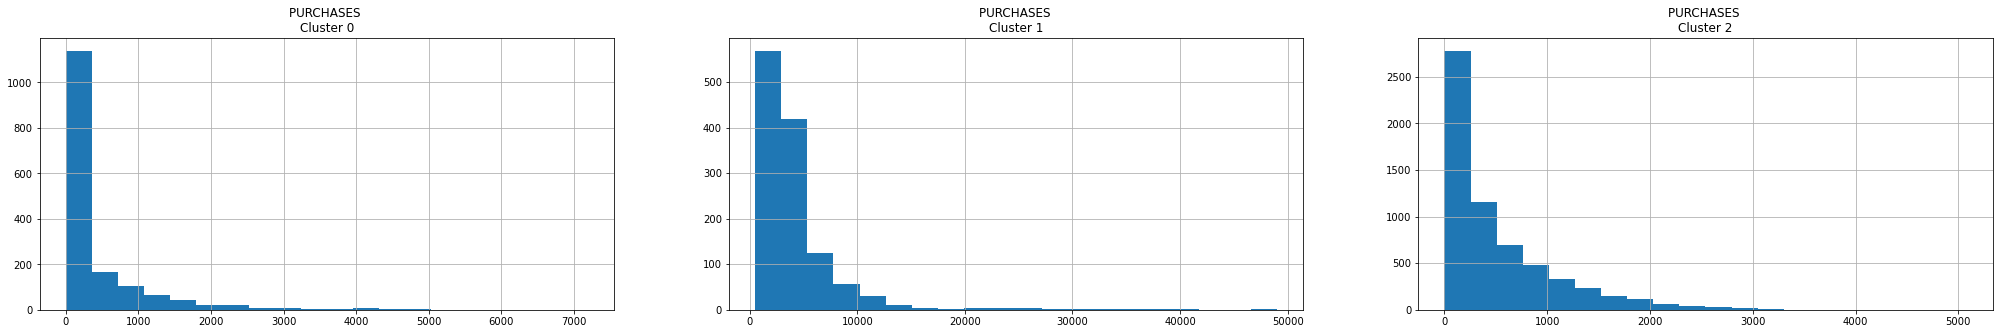

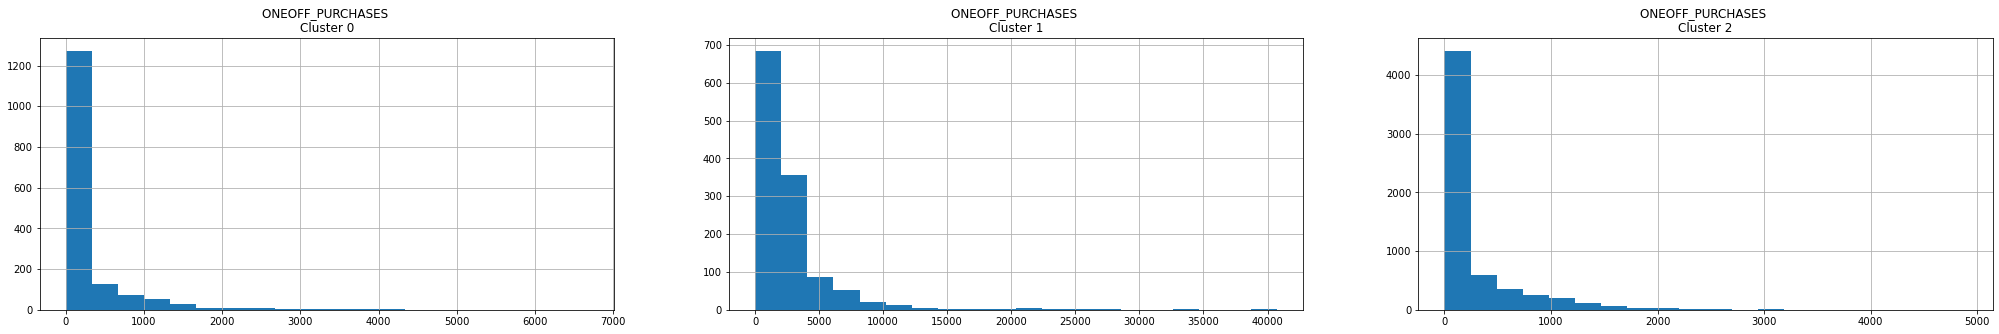

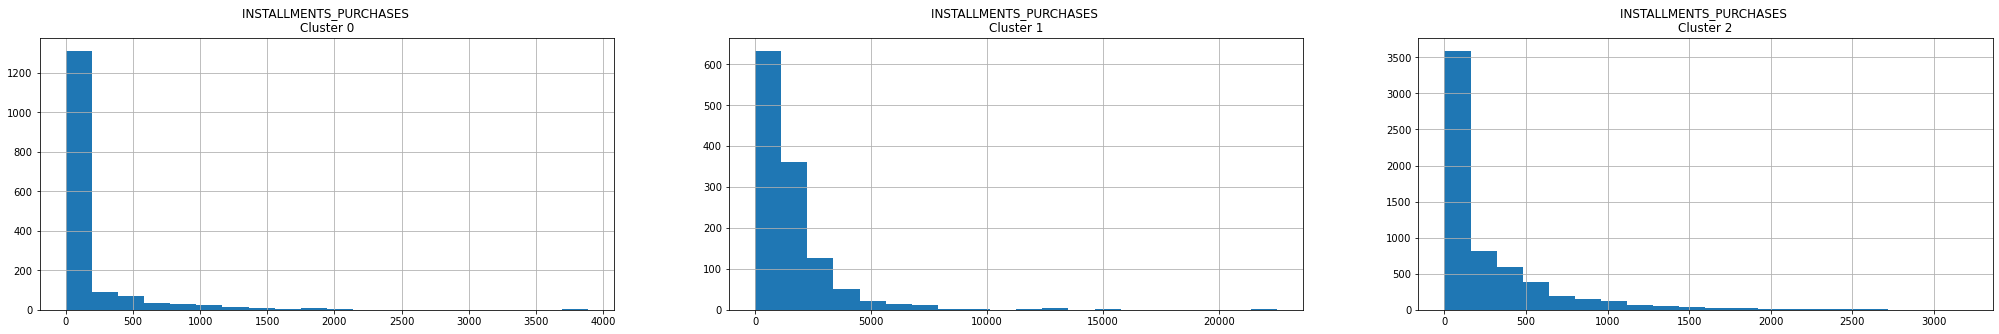

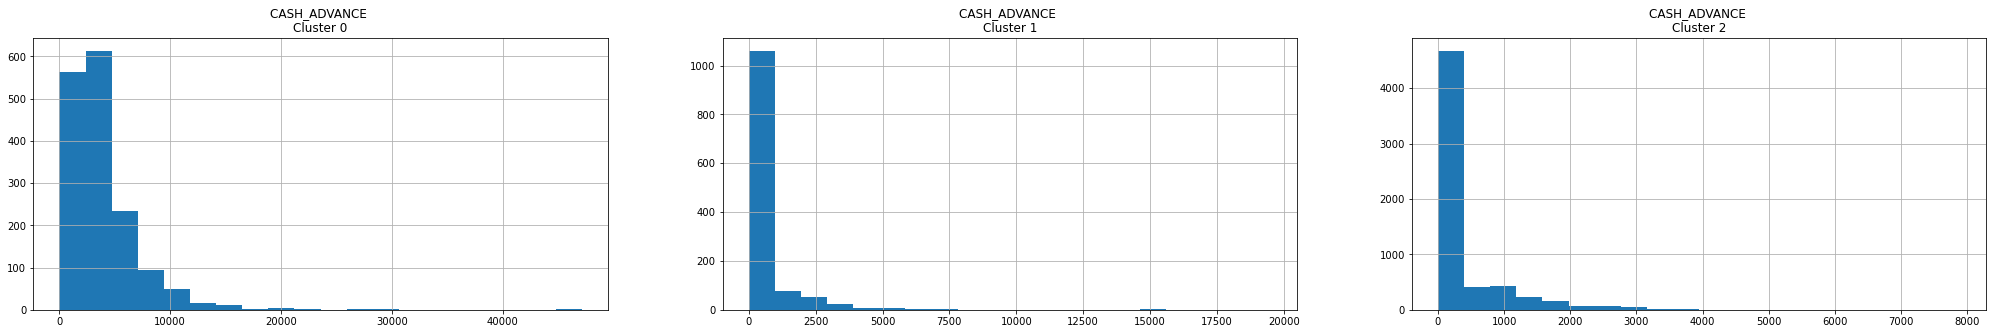

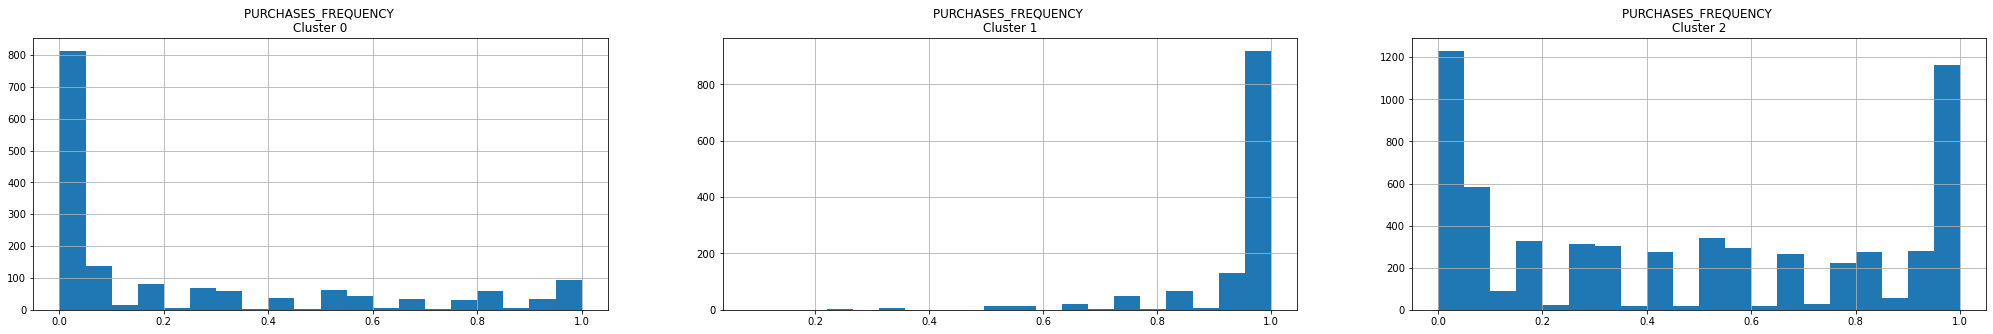

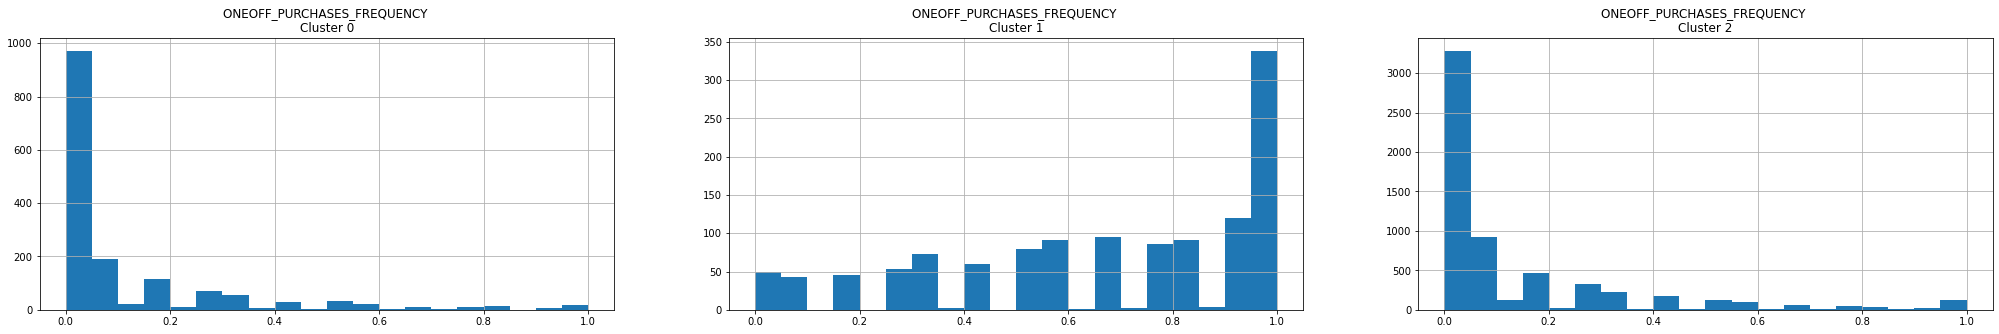

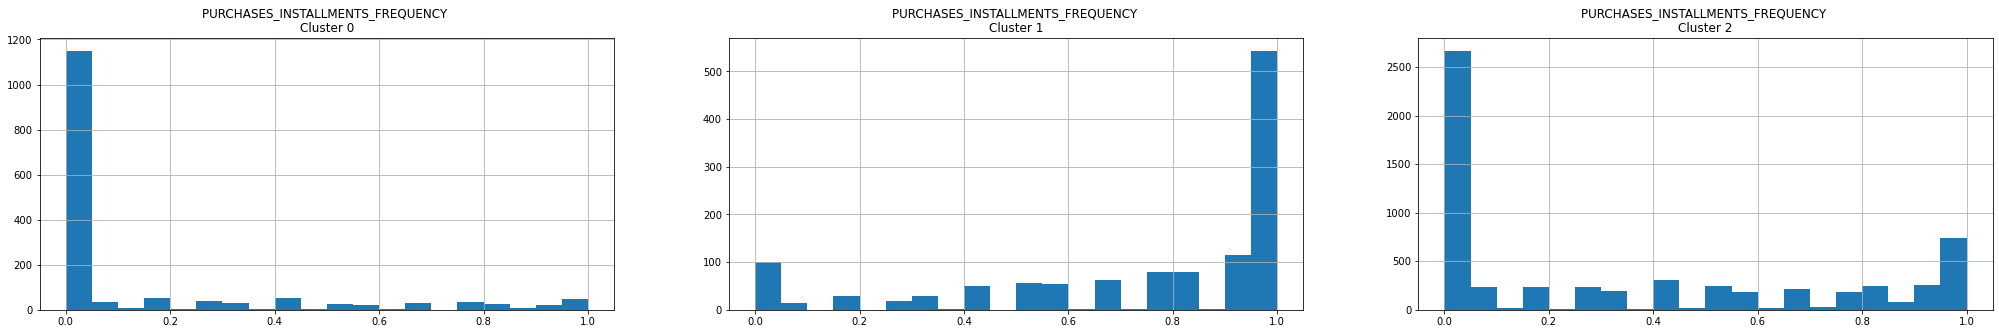

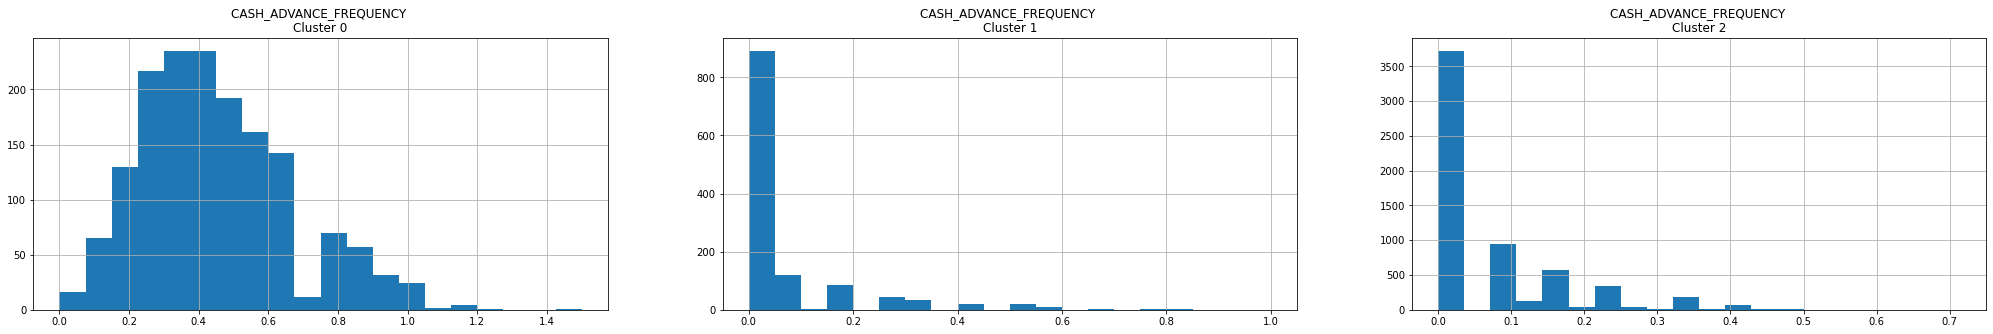

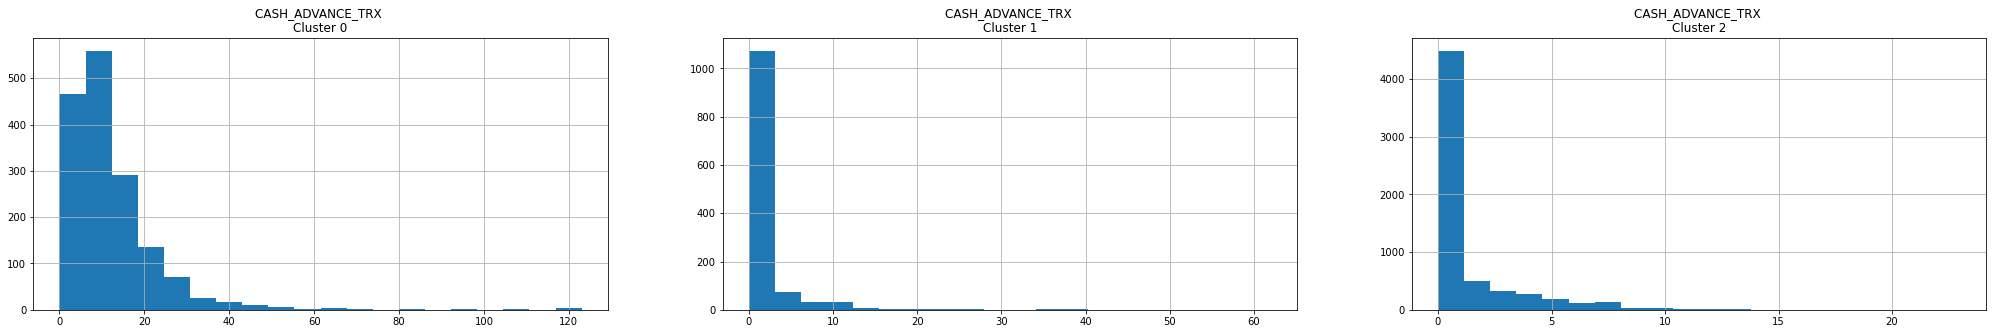

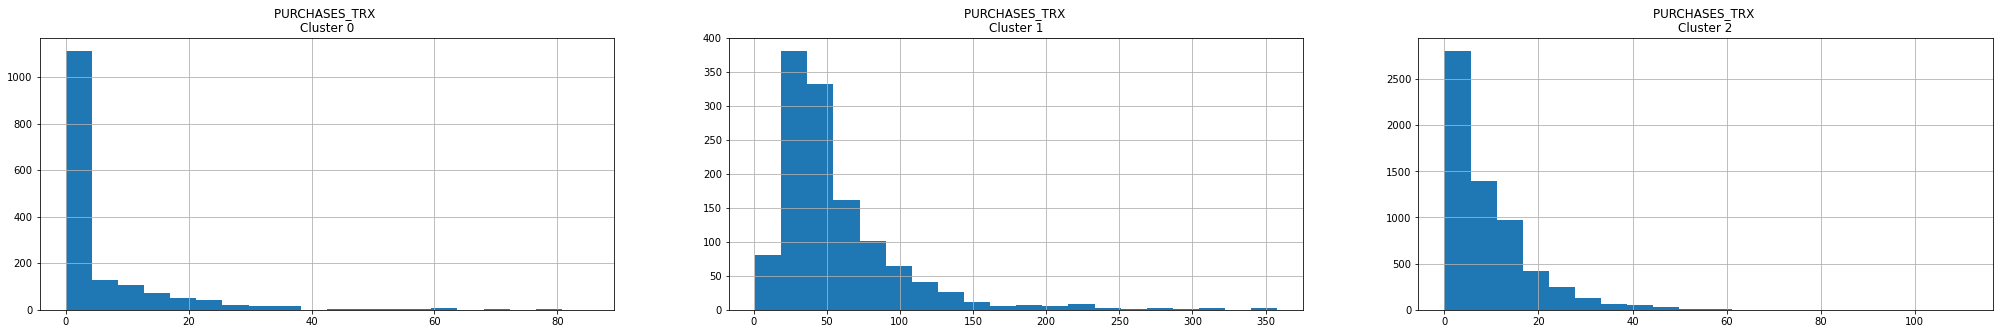

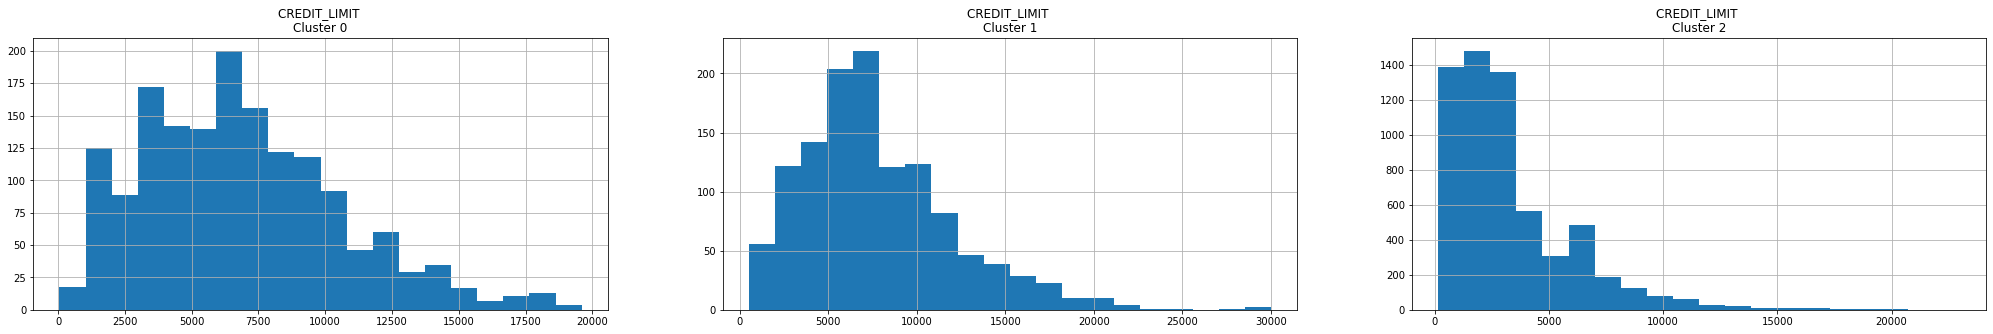

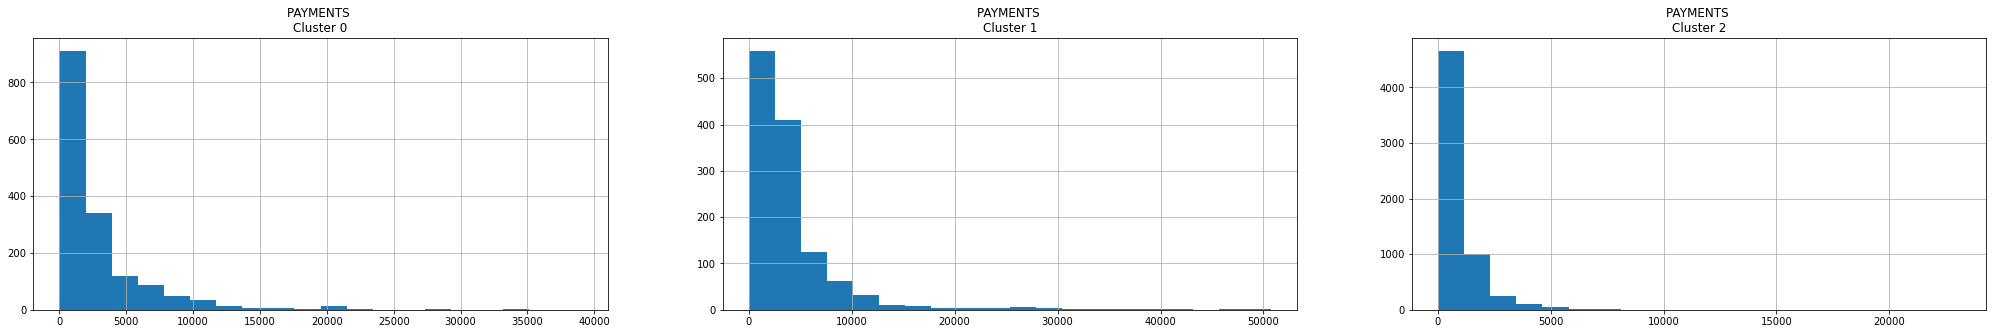

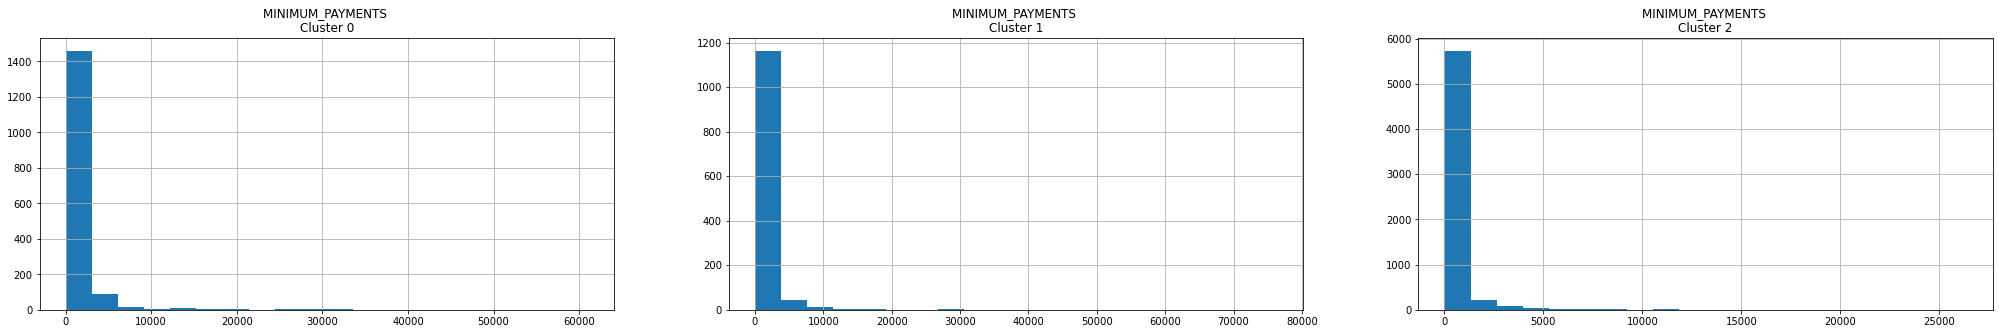

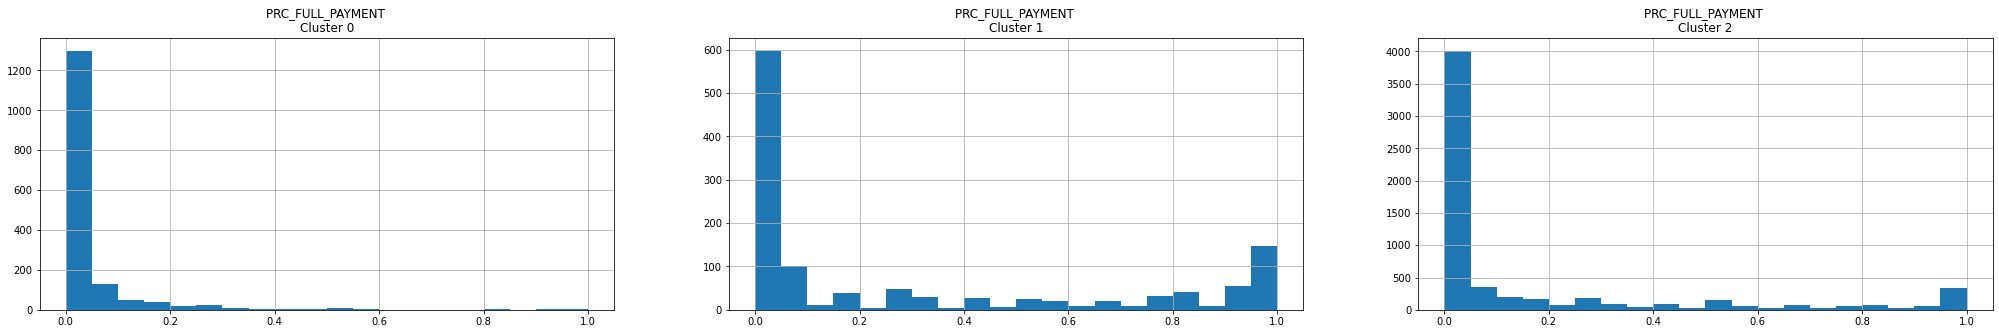

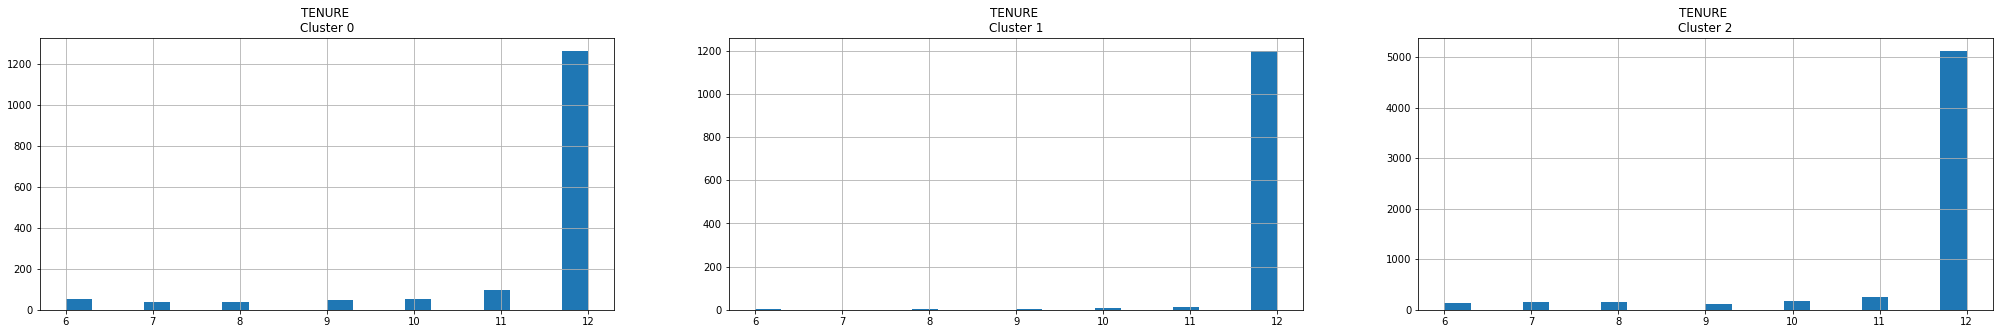

In [56]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(3):
    plt.subplot(1, 3, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [57]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4474,5256.695330,1.0,188.60,188.60,0.0,1934.418697,0.083333,0.083333,0.0,0.333333,4,1,9000.0,1421.954639,1452.249653,0.0,12,0
1147,5538.646971,1.0,460.57,460.57,0.0,2661.970456,0.333333,0.333333,0.0,0.250000,6,6,9500.0,1253.713151,2103.456999,0.0,12,0
7601,1818.933435,1.0,0.00,0.00,0.0,1566.811923,0.000000,0.000000,0.0,0.333333,11,0,2000.0,805.588424,2754.623760,0.0,12,0
1145,7638.382236,1.0,0.00,0.00,0.0,1405.776254,0.000000,0.000000,0.0,0.083333,4,0,15500.0,2284.390267,1970.352152,0.0,12,0
2779,2611.487156,1.0,0.00,0.00,0.0,2527.237714,0.000000,0.000000,0.0,0.583333,16,0,6500.0,1155.285734,726.008517,0.0,12,0


In [58]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3801,199.684606,0.363636,287.40,0.00,287.4,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4500.0,1110.399779,69.685168,0.000000,12,2
3799,2.476557,0.166667,115.70,115.70,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4500.0,0.000000,864.206542,0.000000,6,2
3798,19.281564,0.727273,428.90,0.00,428.9,0.000000,0.583333,0.000000,0.416667,0.000000,0,7,10500.0,418.803807,72.655775,0.200000,12,2
3795,483.261458,1.000000,3228.30,3228.30,0.0,0.000000,0.416667,0.416667,0.000000,0.000000,0,34,600.0,3304.347175,476.295378,0.166667,12,2
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,2


In [59]:
credit_ordered.to_csv('cluster.csv')

## PCA implementation (principal component analysis) and visualization of the results

In [60]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222207, -1.07645432],
       [-1.13829924,  2.50646551],
       [ 0.96968622, -0.38351062],
       ...,
       [-0.92620414, -1.81078583],
       [-2.33655269, -0.65797037],
       [-0.55641904, -0.4004622 ]])

In [61]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076454
1,-1.138299,2.506466
2,0.969686,-0.383511
3,-0.873630,0.043162
4,-1.599435,-0.688583


In [62]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076454,2
1,-1.138299,2.506466,0
2,0.969686,-0.383511,2
3,-0.873630,0.043162,2
4,-1.599435,-0.688583,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

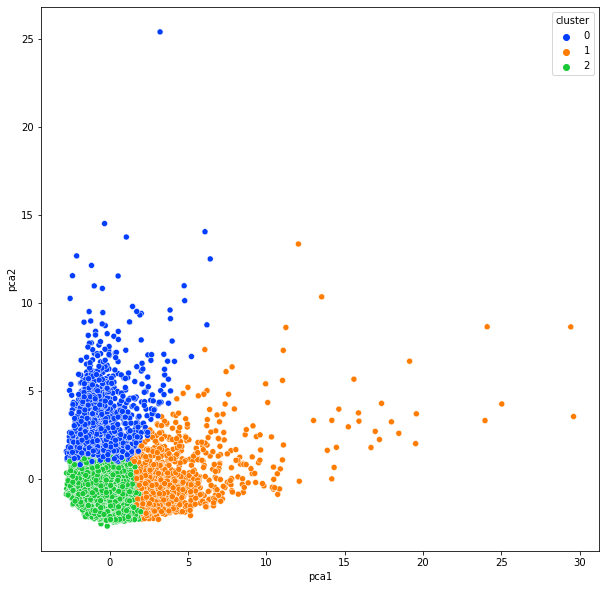

In [63]:
plt.figure(figsize=(10,10))
plt.legend(labels)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = 'bright')

### III.2.- K Means

## Applications of Autoencoders

In [64]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [65]:
creditcard_df_scaled.shape

(8950, 17)

In [66]:
#!pip install tensorflow

In [67]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [68]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [69]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [70]:
# encoder
encoder = Model(input_df, encoded)

In [71]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [72]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 18s 52ms/step - loss: 0.2041
Epoch 2/50
280/280 [==============================] - 15s 54ms/step - loss: 0.0838
Epoch 3/50
280/280 [==============================] - 16s 56ms/step - loss: 0.0601
Epoch 4/50
280/280 [==============================] - 17s 60ms/step - loss: 0.0894
Epoch 5/50
280/280 [==============================] - 17s 62ms/step - loss: 0.0489
Epoch 6/50
280/280 [==============================] - 19s 66ms/step - loss: 0.0643
Epoch 7/50
280/280 [==============================] - 16s 57ms/step - loss: 0.0642
Epoch 8/50
280/280 [==============================] - 15s 54ms/step - loss: 0.0457
Epoch 9/50
280/280 [==============================] - 13s 48ms/step - loss: 0.0422
Epoch 10/50
280/280 [==============================] - 17s 61ms/step - loss: 0.0464
Epoch 11/50
280/280 [==============================] - 16s 56ms/step - loss: 0.0291
Epoch 12/50
280/280 [==============================] - 18s 64ms/step - loss: 0.0312
E

In [73]:
creditcard_df_scaled.shape

(8950, 17)

In [74]:
compact = encoder.predict(creditcard_df_scaled)

In [75]:
compact.shape

(8950, 10)

In [76]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [77]:
compact[0]

array([0.4951514 , 0.14291257, 0.        , 0.        , 0.        ,
       0.36823177, 1.4305013 , 1.2395152 , 1.1143054 , 0.95131755],
      dtype=float32)

In [78]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

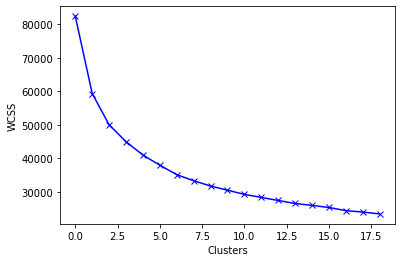

In [79]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

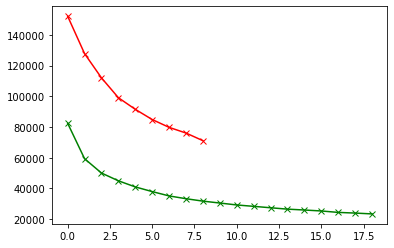

In [80]:
plt.plot(inertias, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [81]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [82]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 1, 0, ..., 2, 2, 2]), (8950,))

In [83]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [84]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.958063,-0.291078
1,1.563281,-0.773100
2,-1.329150,0.583116
3,1.535330,-0.407172
4,-1.445752,-0.070888


In [85]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.958063,-0.291078,0
1,1.563281,-0.773100,1
2,-1.329150,0.583116,0
3,1.535330,-0.407172,1
4,-1.445752,-0.070888,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

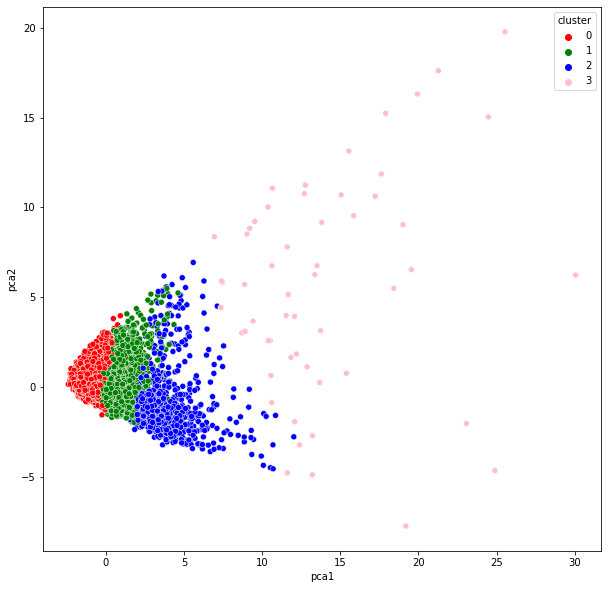

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [87]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
5232,805.368458,1.000000,0.00,0.0,0.00,1257.626787,0.000000,0.0,0.000000,0.333333,7,0,1000.0,1515.789235,201.815134,0.083333,12,0
5230,30.327329,0.909091,284.34,0.0,284.34,0.000000,0.333333,0.0,0.250000,0.000000,0,6,1200.0,269.948292,101.358240,0.272727,12,0
5227,1207.320442,0.900000,359.00,359.0,0.00,0.000000,0.400000,0.4,0.000000,0.000000,0,4,3000.0,239.704238,379.055818,0.000000,10,0
5226,4364.016237,1.000000,2711.90,2711.9,0.00,908.150316,1.000000,1.0,0.000000,0.083333,1,12,9500.0,2428.395411,1040.884331,0.000000,12,0


In [88]:
Prime = df_cluster_ordered.cluster[df_cluster_ordered.cluster == 0]
benign = df_cluster_ordered.cluster[df_cluster_ordered.cluster == 1]

In [89]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.00,1.000000,0.916667,0.083333,1,101,22500.0,46930.598240,2974.069421,0.25,12,3
2823,11642.601560,1.0,15108.47,2370.00,12738.47,0.000000,1.00,0.500000,1.000000,0.000000,0,298,12000.0,16005.452040,11652.565110,0.00,12,3
4376,10571.411070,1.0,7739.48,0.00,7739.48,0.000000,1.00,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.00,12,3
7378,4228.417754,1.0,11994.71,11994.71,0.00,496.521561,0.25,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.00,12,3
645,1482.235539,1.0,14604.87,2475.93,12128.94,0.000000,1.00,0.583333,1.000000,0.000000,0,219,15500.0,14462.630560,340.717801,1.00,12,3


In [90]:
df_cluster_ordered.to_excel('cluster_ordereded.xlsx')